## Pruebas en Sucio
### (este archivo es un desastre, asi que no creo que aporte nada)

In [1]:
import os

In [2]:
contenido = os.listdir('src')
print(contenido)
juegos = []

for juego in contenido:
    juego = juego.replace('.py','')
    juego = juego.replace('_',' ')

    juegos.append(juego.upper())

juegos

['ahoracado.py', 'hundir_la_flota.py', 'piedra_papel_tijera.py', 'preguntados.py', 'support', 'tres_en_raya.py', '__pycache__']


['AHORACADO',
 'HUNDIR LA FLOTA',
 'PIEDRA PAPEL TIJERA',
 'PREGUNTADOS',
 'SUPPORT',
 'TRES EN RAYA',
 '  PYCACHE  ']

## prueba codigo HUNDIR LA FLOTA

## creacion de clase

In [5]:
import string
import random
from src.support import support_hundir_la_flota as support

class HundirLaFlota:
    def __init__(self):
        self.caracter_mar = " "
        self.caracter_barco = "b"
        self.longitud = 10
        self.barcos = [('Portaviones',5), ('Acorazado',4), ('Submarino',3), ('Destructor',3), ('Patrullero',2)]
        self.tablero_maquina = list(map(lambda _: [self.caracter_mar] * self.longitud, range(self.longitud)))
        self.tablero_jugador = list(map(lambda _: [self.caracter_mar] * self.longitud, range(self.longitud)))

        self.numeros_columnas = [str(i) for i in range(1, self.longitud + 1)] #para pintar el tablero
        letras = string.ascii_uppercase
        self.letras_filas = [letras[i] for i in range(0,self.longitud)] #para pintar el tablero



    def jugar(self):
        print('estas jugando a hundir la flota \n')

        #hacemos la colocacion aleatoria de los barcos para la maquina
        self.colocar_barcos_maquina()

        self.pintar_tableros()

        return self.terminar_juego()





    #PINTAR TABLEROS
    def pintar_tableros(self):
        print(f"\n\t{support.texto_maquina}\t{support.texto_vs}\t{support.texto_jugador}")

        tablero_jugador = self.tablero_jugador
        for i, fila_maquina in enumerate(self.tablero_maquina):
            #comentar .replace() para no mostrar donde estan los barcos
            contenido_fila_maquina = " | ".join(fila_maquina) #.replace(caracter_barco,caracter_mar)
            contenido_fila_jugador = " | ".join(tablero_jugador[i]) #.replace(caracter_barco,caracter_mar)

            #primera linea del tablero
            print(f"  {"+---" * self.longitud}" + "+\t",
                  f"  {"+---" * self.longitud}" + "+")
            
            #contenido de cada linea
            print(f"{self.letras_filas[i]} | {contenido_fila_maquina}" + " |\t",
                  f"{self.letras_filas[i]} | {contenido_fila_jugador}" + " |")
            
        #linea final del tablero
        print("  " + "+---" * self.longitud + "+\t",
              "  " + "+---" * self.longitud + "+")
        
        #numeros de las columnas
        print("    " + "   ".join(self.numeros_columnas) + "\t",
              "    " + "   ".join(self.numeros_columnas)) 



    def colocar_barcos_maquina(self):
        for barco in self.barcos:
            orientacion = ['horizontal', 'vertical']
            orientacion_elegida = orientacion[random.randint(0, 1)] #elige entre vertical u horizontal

            while True:
                posicion = self.elegir_posicion_aleatoria()
                letra_fila = self.letras_filas.index(posicion['fila'])#int
                n_columna = int(posicion['columna']) - 1 # -1 porque trabajamos con indices de listas
                fila = self.tablero_maquina[letra_fila]

                if orientacion_elegida == 'horizontal':
                    if n_columna + barco[1] <= len(fila):
                        espacio_libre = True
                        for i in range(n_columna, n_columna + barco[1]):
                            if self.tablero_maquina[letra_fila][i] == self.caracter_barco:
                                espacio_libre = False
                                break

                        if espacio_libre:
                            for i in range(n_columna, n_columna + barco[1]):
                                self.tablero_maquina[letra_fila][i] = self.caracter_barco
                            break  # Pasamos al siguiente barco

                # Orientación vertical
                else:
                    if letra_fila + barco[1] <= len(self.tablero_maquina):
                        espacio_libre = True
                        for i in range(letra_fila, letra_fila + barco[1]):
                            if self.tablero_maquina[i][n_columna] == self.caracter_barco:
                                espacio_libre = False
                                break 

                        if espacio_libre:
                            for i in range(letra_fila, letra_fila + barco[1]):
                                self.tablero_maquina[i][n_columna] = self.caracter_barco
                            break # Pasamos al siguiente barco



    def elegir_posicion_aleatoria(self):
        fila = self.letras_filas[random.randint(0,len(self.letras_filas)-1)]
        columna = self.numeros_columnas[random.randint(0,len(self.numeros_columnas)-1)]

        return {
            'fila': fila,
            'columna': columna
        }


    def terminar_juego(self):
        pass
        # while True:
        #     print("\n1. Volver a jugar")
        #     print("2. Volver al menú de juegos")
        #     print("3. Terminar el programa")
        #     choice = input("Selecciona una opción: ")
        #     if choice == '1':
        #         return 'volver_jugar'
        #     elif choice == '2':
        #         return 'volver_menu'
        #     elif choice == '3':
        #         return 'salir'
        #     else:
        #         print("Opción no válida. Intenta de nuevo.")


clase = HundirLaFlota()
clase.jugar()

estas jugando a hundir la flota 


	
 ┬┬ ┬┌─┐┌─┐┌┬┐┌─┐┬─┐
 ││ ││ ┬├─┤ │││ │├┬┘
└┘└─┘└─┘┴ ┴─┴┘└─┘┴└─
	
 ▄▀▀▄ ▄▀▀▄  ▄▀▀▀▀▄ 
█   █    █ █ █   ▐ 
▐  █    █     ▀▄   
   █   ▄▀  ▀▄   █  
    ▀▄▀     █▀▀▀   
            ▐                
	
┌┬┐┌─┐┌─┐ ┬ ┬┬┌┐┌┌─┐
│││├─┤│─┼┐│ │││││├─┤
┴ ┴┴ ┴└─┘└└─┘┴┘└┘┴ ┴

  +---+---+---+---+---+---+---+---+---+---+	   +---+---+---+---+---+---+---+---+---+---+
A |   |   |   |   |   |   |   |   |   |   |	 A |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+	   +---+---+---+---+---+---+---+---+---+---+
B |   |   | b | b | b | b | b |   |   |   |	 B |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+	   +---+---+---+---+---+---+---+---+---+---+
C |   |   |   |   | b | b | b |   |   |   |	 C |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+	   +---+---+---+---+---+---+---+---+---+---+
D |   |   |   |   |   |   |   |   | b |   |	 D |   |   |   |   |   |   |   |   

### seccion crear tablero y pintarlo

In [4]:


#CREAR TABLERO
caracter_mar = " "
caracter_barco = "b"
longitud = 10
tablero = list(map(lambda _: [caracter_mar] * longitud, range(longitud)))

numeros_columnas = [str(i) for i in range(1, longitud + 1)]

letras = string.ascii_uppercase
letras_filas = [letras[i] for i in range(0,longitud)]


#PINTAR TABLERO
def pintar_tablero():
    for i, fila in enumerate(tablero):
        #comentor .replace() para no mostrar donde estan los barcos
        contenido_fila = " | ".join(fila) #.replace(caracter_barco,caracter_mar)

        print(f"  {"+---" * longitud}" + "+")
        print(f"{letras_filas[i]} | {contenido_fila}" + " |")

    print("  " + "+---" * longitud + "+") #linea final del tablero
    print("    " + "   ".join(numeros_columnas)) #numeros de las columnas

#pintar_tablero()




#COLOCAR BARCOS MAQUINA


#elegimos posicion aleatoria
def elegir_posicion_aleatoria():
     
    fila = letras_filas[random.randint(0,len(letras_filas)-1)]
    columna = numeros_columnas[random.randint(0,len(numeros_columnas)-1)]

    return {
        'fila': fila,
        'columna': columna
    }



barcos = [('Portaviones',5), ('Acorazado',4), ('Submarino',3), ('Destructor',3), ('Patrullero',2)]

for barco in barcos:
    orientacion = ['horizontal', 'vertical']
    orientacion_elegida = orientacion[random.randint(0, 1)] #elige entre vertical u horizontal

    while True:
        posicion = elegir_posicion_aleatoria()
        letra_fila = letras_filas.index(posicion['fila'])#int
        n_columna = int(posicion['columna']) - 1 # -1 porque trabajamos con indices de listas
        fila = tablero[letra_fila]

        if orientacion_elegida == 'horizontal':
            if n_columna + barco[1] <= len(fila):
                espacio_libre = True
                for i in range(n_columna, n_columna + barco[1]):
                    if tablero[letra_fila][i] == caracter_barco:
                        espacio_libre = False
                        break

                if espacio_libre:
                    for i in range(n_columna, n_columna + barco[1]):
                        tablero[letra_fila][i] = caracter_barco
                    break  # Pasamos al siguiente barco

        # Orientación vertical
        else:
            if letra_fila + barco[1] <= len(tablero):
                espacio_libre = True
                for i in range(letra_fila, letra_fila + barco[1]):
                    if tablero[i][n_columna] == caracter_barco:
                        espacio_libre = False
                        break 

                if espacio_libre:
                    for i in range(letra_fila, letra_fila + barco[1]):
                        tablero[i][n_columna] = caracter_barco
                    break # Pasamos al siguiente barco


pintar_tablero()

  +---+---+---+---+---+---+---+---+---+---+
A |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+
B |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+
C |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+
D |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+
E | b | b | b | b |   | b | b | b |   |   |
  +---+---+---+---+---+---+---+---+---+---+
F |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+
G |   |   |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+
H |   |   | b | b | b | b | b |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+
I |   |   |   |   |   |   | b | b | b |   |
  +---+---+---+---+---+---+---+---+---+---+
J |   | b | b |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+---+---+
    1   2   3   4   5   6   7   8   9   10


# barcos a colocar
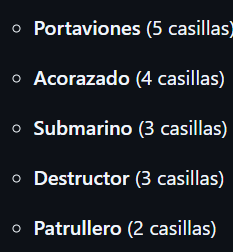

## continuacion de desarrollo hundir la flota

In [18]:
import string
import random
from src.support import support_hundir_la_flota as support

class HundirLaFlota:
    def __init__(self):
        self.caracter_mar = " "
        self.caracter_barco = "b"
        self.caracter_barco_tocado = "X"
        self.caracter_barco_hundido = "O"
        self.ataque_fallido = "-"

        self.longitud = 10
        self.barcos = [('Portaviones',5), ('Acorazado',4), ('Submarino',3), ('Destructor',3), ('Patrullero',2)]

        self.tablero_maquina = list(map(lambda _: [self.caracter_mar] * self.longitud, range(self.longitud)))
        self.tablero_jugador = list(map(lambda _: [self.caracter_mar] * self.longitud, range(self.longitud)))

        self.numeros_columnas = [str(i) for i in range(1, self.longitud + 1)]
        letras = string.ascii_uppercase
        self.letras_filas = [letras[i] for i in range(0,self.longitud)]



    def jugar(self):
        print('estas jugando a hundir la flota \n')

        self.colocar_barcos_random('maquina')

        self.colocar_barcos_random('jugador')

        self.pintar_tableros()

        while True:
            resultado =self.comenzar_juego('jugador')#indicamos quien empieza jugando (jugador, maquina)

            if resultado == 'terminar':
                break
            else:
                self.comenzar_juego(resultado)


        return self.terminar_juego()





    #PINTAR TABLEROS
    def pintar_tableros(self):

        print(support.texto_junto)

        tablero_jugador = self.tablero_jugador
        for i, fila_maquina in enumerate(self.tablero_maquina):
            #comentar .replace() para no mostrar donde estan los barcos
            contenido_fila_maquina = " | ".join(fila_maquina) #.replace(caracter_barco,caracter_mar)
            contenido_fila_jugador = " | ".join(tablero_jugador[i]) #.replace(caracter_barco,caracter_mar)

            #primera linea del tablero
            print(f"    {"+---" * self.longitud}" + "+\t\t",
                  f"    {"+---" * self.longitud}" + "+")
            
            #contenido de cada linea
            print(f"  {self.letras_filas[i]} | {contenido_fila_jugador}" + " |\t\t",
                  f"  {self.letras_filas[i]} | {contenido_fila_maquina}" + " |")
            
        #linea final del tablero
        print("    " + "+---" * self.longitud + "+\t\t",
              "    " + "+---" * self.longitud + "+")
        
        #numeros de las columnas
        print("      " + "   ".join(self.numeros_columnas) + "\t\t",
              "      " + "   ".join(self.numeros_columnas)) 



    def colocar_barcos_random(self, jugador = "maquina"):

        tablero_indicado = self.tablero_maquina if jugador == 'maquina' else self.tablero_jugador

        for barco in self.barcos:
            orientacion = ['horizontal', 'vertical']
            orientacion_elegida = orientacion[random.randint(0, 1)] #elige entre vertical u horizontal

            while True:
                posicion = self.elegir_posicion_aleatoria()
                letra_fila = self.letras_filas.index(posicion['fila'])#int
                n_columna = int(posicion['columna']) - 1 # -1 porque trabajamos con indices de listas
                fila = tablero_indicado[letra_fila]

                if orientacion_elegida == 'horizontal':
                    if n_columna + barco[1] <= len(fila):
                        espacio_libre = True
                        for i in range(n_columna, n_columna + barco[1]):
                            if tablero_indicado[letra_fila][i] == self.caracter_barco:
                                espacio_libre = False
                                break

                        if espacio_libre:
                            for i in range(n_columna, n_columna + barco[1]):
                                tablero_indicado[letra_fila][i] = self.caracter_barco
                            break  # Pasamos al siguiente barco

                # Orientación vertical
                else:
                    if letra_fila + barco[1] <= len(tablero_indicado):
                        espacio_libre = True
                        for i in range(letra_fila, letra_fila + barco[1]):
                            if tablero_indicado[i][n_columna] == self.caracter_barco:
                                espacio_libre = False
                                break 

                        if espacio_libre:
                            for i in range(letra_fila, letra_fila + barco[1]):
                                tablero_indicado[i][n_columna] = self.caracter_barco
                            break # Pasamos al siguiente barco


    def comenzar_juego(self, turno = 'jugador'):
        mensaje = "ES TU TURNO DE ATACAR!\n" if turno == 'jugador' else "TURNO DE LA MAQUINA!\n"
        print(mensaje)

        fila = 0
        columna = 0
        tablero_indicado = self.tablero_maquina if turno == 'jugador' else self.tablero_jugador

        if turno == 'maquina':
            posicion_aleatoria = self.elegir_posicion_aleatoria()
            columna = int(posicion_aleatoria['columna'])
            fila = self.letras_filas.index(posicion_aleatoria['fila'])
            
        #turno del jugador
        else:
            while True:
                fila_input = input(f"Introduce la LETRA de la fila --> ").upper()
                if fila_input in self.letras_filas:
                    fila = self.letras_filas.index(fila_input)
                    break
                else:
                    print("Fila inválida. Inténtalo de nuevo.")
            
            while True:
                columna_input = input(f"Introduce el NUMERO de columna --> ")
                if columna_input.isdigit() and 1 <= int(columna_input) <= self.longitud:
                    columna = int(columna_input) - 1
                    break
                else:
                    print("Columna inválida. Inténtalo de nuevo.")
        
        # Caso Acierto
        if self.tablero_maquina[fila][columna] == self.caracter_barco:
            self.tablero_maquina[fila][columna] = self.caracter_barco_tocado
            print("YEAAH! Has golpeado un barco.\n")

            return turno
        
        # Caso Fallo
        else:
            print("Fallo!. No había ningún barco.\n")
            print("CAMBIO DE TURNO\n")
            self.tablero_maquina[fila][columna] = self.ataque_fallido

            return 'maquina' if turno == 'jugador' else 'maquina'
        


    def elegir_posicion_aleatoria(self):
        fila = self.letras_filas[random.randint(0,len(self.letras_filas)-1)]
        columna = self.numeros_columnas[random.randint(0,len(self.numeros_columnas)-1)]

        return {
            'fila': fila,
            'columna': columna
        }


    def terminar_juego(self):
        return
        while True:
            print("\n1. Volver a jugar")
            print("2. Volver al menú de juegos")
            print("3. Terminar el programa")
            choice = input("Selecciona una opción: ")
            if choice == '1':
                return 'volver_jugar'
            elif choice == '2':
                return 'volver_menu'
            elif choice == '3':
                return 'salir'
            else:
                print("Opción no válida. Intenta de nuevo.")

clase = HundirLaFlota()
clase.jugar()

estas jugando a hundir la flota 


     ▐▄▄▄▄• ▄▌ ▄▄ •  ▄▄▄· ·▄▄▄▄       ▄▄▄       ▌ ▐·.▄▄ ·     • ▌ ▄ ·.  ▄▄▄· .▄▄▄  ▄• ▄▌▪   ▐ ▄  ▄▄▄· 
      ·███▪██▌▐█ ▀ ▪▐█ ▀█ ██▪ ██▪     ▀▄ █·    ▪█·█▌▐█ ▀.     ·██ ▐███▪▐█ ▀█ ▐▀•▀█ █▪██▌██ •█▌▐█▐█ ▀█ 
    ▪▄ ███▌▐█▌▄█ ▀█▄▄█▀▀█ ▐█· ▐█▌▄█▀▄ ▐▀▀▄     ▐█▐█•▄▀▀▀█▄    ▐█ ▌▐▌▐█·▄█▀▀█ █▌·.█▌█▌▐█▌▐█·▐█▐▐▌▄█▀▀█ 
    ▐▌▐█▌▐█▄█▌▐█▄▪▐█▐█ ▪▐▌██. ██▐█▌.▐▌▐█•█▌     ███ ▐█▄▪▐█    ██ ██▌▐█▌▐█ ▪▐▌▐█▪▄█·▐█▄█▌▐█▌██▐█▌▐█ ▪▐▌
     ▀▀▀• ▀▀▀ ·▀▀▀▀  ▀  ▀ ▀▀▀▀▀• ▀█▄▀▪.▀  ▀    . ▀   ▀▀▀▀     ▀▀  █▪▀▀▀ ▀  ▀ ·▀▀█.  ▀▀▀ ▀▀▀▀▀ █▪ ▀  ▀ 

    +---+---+---+---+---+---+---+---+---+---+		     +---+---+---+---+---+---+---+---+---+---+
  A |   |   |   |   |   | b | b | b |   |   |		   A |   | b |   |   |   |   |   |   |   |   |
    +---+---+---+---+---+---+---+---+---+---+		     +---+---+---+---+---+---+---+---+---+---+
  B |   |   |   |   |   |   |   | b |   |   |		   B |   | b |   |   |   |   |   | b |   |   |
    +---+---+---+---+---+---+---+---+---+---+		     +---+---+---+---+---+

KeyboardInterrupt: Interrupted by user

# desarrollo del AHORCADO

In [3]:
from src.support.support_ahorcado import stickman_dibujos

class Ahorcado:
    def __init__(self):
        # Inicializamos con los trozos del stickman (muñeco del ahorcado)
        self.trozos_stickman = stickman_dibujos
        self.intentos_restantes = 6
        self.palabra_secreta = ""
        self.letras_adivinadas = []
        self.letras_intentadas = []

    def elegir_palabra(self):
        palabras = ['python', 'ahorcado', 'desarrollador', 'inteligencia', 'programacion']
        import random
        self.palabra_secreta = random.choice(palabras).lower()
        self.letras_adivinadas = ['_'] * len(self.palabra_secreta)
        self.letras_intentadas = []
        self.intentos_restantes = 6

    def mostrar_stickman(self):
        # Mostramos el estado del ahorcado según los intentos restantes
        print(self.trozos_stickman[6 - self.intentos_restantes])

    def mostrar_estado(self):
        # Mostrar la palabra oculta con los espacios y las letras adivinadas
        print(' '.join(self.letras_adivinadas))

    def jugar(self):
        print("¡Estas jugando al AHORCADO!")
        self.elegir_palabra()  # Elegir una palabra al azar

        while self.intentos_restantes > 0 and '_' in self.letras_adivinadas:
            self.mostrar_stickman()
            print(f"\nTe quedan {self.intentos_restantes} intentos.")
            self.mostrar_estado()
            print("Letras intentadas:", ', '.join(self.letras_intentadas))

            intento = input("\nAdivina una letra: ").lower()

            if len(intento) != 1 or not intento.isalpha():
                print("Por favor, ingresa una sola letra.")
                continue

            if intento in self.letras_intentadas:
                print(f"Ya has intentado la letra '{intento}'.")
                continue

            self.letras_intentadas.append(intento)

            if intento in self.palabra_secreta:
                print(f"¡Bien hecho! La letra '{intento}' está en la palabra.")
                for i in range(len(self.palabra_secreta)):
                    if self.palabra_secreta[i] == intento:
                        self.letras_adivinadas[i] = intento
            else:
                print(f"La letra '{intento}' no está en la palabra.")
                self.intentos_restantes -= 1

        # Verificación final de victoria o derrota
        if '_' not in self.letras_adivinadas:
            print("\n¡Felicidades! Has adivinado la palabra:", self.palabra_secreta)
        else:
            self.mostrar_stickman()
            print("\n¡Lo siento! Has perdido. La palabra era:", self.palabra_secreta)

        self.terminar_juego()

    def terminar_juego(self):
        while True:
            print("\n1. Volver a jugar")
            print("2. Volver al menú de juegos")
            print("3. Terminar el programa")
            choice = input("Selecciona una opción: ")
            if choice == '1':
                self.jugar()
            elif choice == '2':
                return 'volver_menu'
            elif choice == '3':
                return 'salir'
            else:
                print("Opción no válida. Intenta de nuevo.")


Estas jugando al AHORCADO


'\n  _______\n  |     |\n  |     O\n  |    /|  |    /   |\n---------\n'